In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [5]:
dataset = pandas.read_json('../input/pasos.json')

In [6]:
dataset.head()

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz


In [7]:
dataset.columns

Index(['location', 'name', 'province'], dtype='object')

In [8]:
dataset['province'].unique()

array(['Tierra del Fuego', 'Santa Cruz',
       'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
       'Chubut', 'Rio Negro', 'Neuquen', 'NEUQUEN', 'Buenos Aires',
       'Mendoza', 'San Luis', 'San Juan', 'Santa Fe', 'Córdoba',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

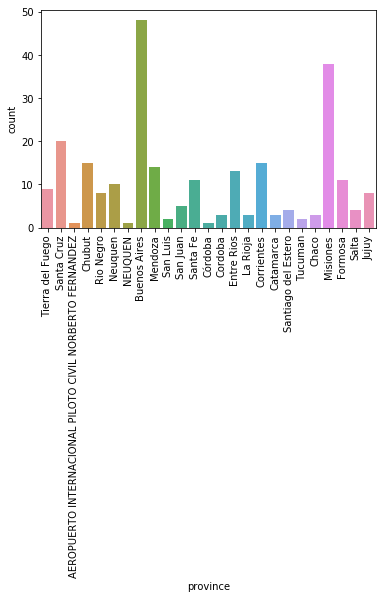

In [9]:
seaborn.countplot(x=dataset['province'])
plt.xticks(rotation=90)

El aeropuerto internacional piloto civil Norberto Fernandez es un aeropuerto de la provincia de Santa Cruz. Debemos incluirlo allí.

Por su parte, también observamos que la provincia de Córdoba figura como dos valores distintos pues, una aparece sin acento.

Finalmente, la provincia de Neuquén también figura repetida, puesto que existe el valor en mayúsculas y en minúsculas.

In [23]:
def changename(prov):
    if 'ó' in prov:
        prov = prov.replace('ó','o')
    elif 'NEUQUEN' == prov:
        prov = 'Neuquen'
    elif 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ' == prov:
        prov = 'Santa Cruz'
    return prov
        

In [24]:
dataset['province'].apply(changename)[dataset['province'].apply(changename)== 'Cordoba']

119    Cordoba
122    Cordoba
125    Cordoba
126    Cordoba
Name: province, dtype: object

In [25]:
dataset['province'][dataset['province']== 'Cordoba']

122    Cordoba
125    Cordoba
126    Cordoba
Name: province, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

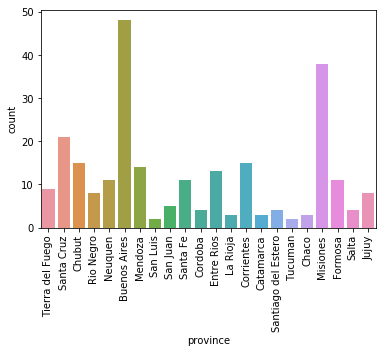

In [26]:
seaborn.countplot(x=dataset['province'].apply(changename))
plt.xticks(rotation=90)